<a href="https://colab.research.google.com/github/mhimayath/NoteBooks/blob/main/DataCamp_SupervisedLearningwithScikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [31]:
iris = datasets.load_iris()

In [32]:
type(iris)
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [33]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
# df.columns = iris.feature_names
df['target'] = iris.target
df['target']= df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f685841a320>,
      dtype=object)

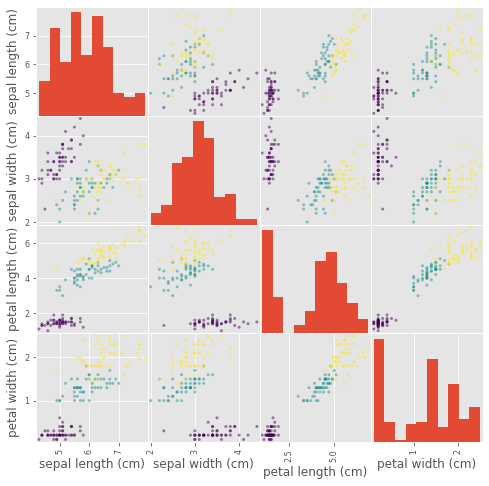

In [35]:
pd.plotting.scatter_matrix(df,c=iris.target,figsize=[8,8])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'],iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [37]:
test_data = np.array([[5.6, 2.8, 3.9, 1.1],[5.7, 2.6, 3.8, 1.3],[4.7, 3.2, 1.3, 0.2]])

In [38]:
predicted = knn.predict(test_data)
predicted # {0:'setosa',1:'versicolor',2:'virginica'}

array([1, 1, 0])

In [39]:
cols = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('/content/drive/MyDrive/datasets/Supervised Learning with scikit-learn/house-votes-84.csv',header=None,names=cols,na_values='?')
df.fillna('n',inplace=True)
# df.iloc[:,1:].map({'y':1,'n':0})
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [40]:
for i in df:
  if i != 'party':
    df[i] = df[i].astype('object')
    df[i] = df[i].map({"n":0,"y":1})
df.head()
# df.iloc[1,1]

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


### k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called df.


Instructions

Import KNeighborsClassifier from sklearn.neighbors.

Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.

Fit the classifier to the data using the .fit() method.

In [41]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [42]:
X_new = np.array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
        0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541],[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
        0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541]])
X_new

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
        0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541],
       [0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
        0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541]])

In [43]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party',axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
# print("Prediction: {}".format(y_pred))

Prediction: ['democrat' 'democrat']


http://yann.lecun.com/exdb/mnist/

### The digits recognition dataset
Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

Instructions

Import datasets from sklearn and matplotlib.pyplot as plt.
Load the digits dataset using the .load_digits() method on datasets.
Print the keys and DESCR of digits.
Print the shape of images and data keys using the . notation.
Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

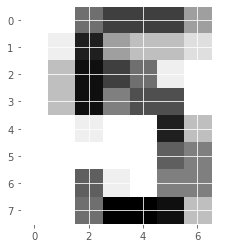

In [44]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.DESCR)
print(digits.keys())

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [45]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [46]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

Instructions

Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
Create an array for the features using digits.data and an array for the target using digits.target.
Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
Create a k-NN classifier with 7 neighbors and fit it to the training data.
Compute and print the accuracy of the classifier's predictions using the .score() method.

In [47]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


### Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

Instructions

Inside the for loop:
Setup a k-NN classifier with the number of neighbors equal to k.
Fit the classifier with k neighbors to the training data.
Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

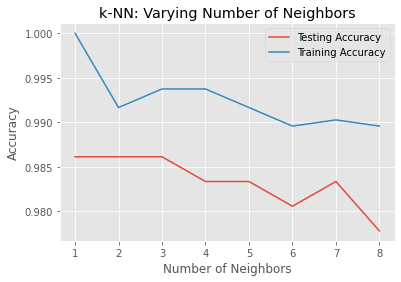

In [48]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() # We can see that the model is good from k being 1 to 3 


### Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

Instructions

Import numpy and pandas as their standard aliases.
Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
Create array X for the 'fertility' feature and array y for the 'life' target variable.
Reshape the arrays by using the .reshape() method and passing in -1 and 1.

In [49]:

# Read the CSV file into a DataFrame: df
df = pd.read_csv('/content/drive/MyDrive/datasets/Supervised Learning with scikit-learn/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print(X,y)
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print(X,y)
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


[2.73 6.43 2.24 1.4  1.96 1.41 1.99 1.89 2.38 1.83 1.42 1.82 2.91 5.27
 2.51 3.48 2.86 1.9  1.43 6.04 6.48 3.05 5.17 1.68 6.81 1.89 2.43 5.05
 5.1  1.91 4.91 1.43 1.5  1.89 3.76 2.73 2.95 2.32 5.31 5.16 1.62 2.74
 1.85 1.97 4.28 5.8  1.79 1.37 4.19 1.46 4.12 5.34 5.25 2.74 3.5  3.27
 1.33 2.12 2.64 2.48 1.88 2.   2.92 1.39 2.39 1.34 2.51 4.76 1.5  1.57
 3.34 5.19 1.42 1.63 4.79 5.78 2.05 2.38 6.82 1.38 4.94 1.58 2.35 1.49
 2.37 2.44 5.54 2.05 2.9  1.77 2.12 2.72 7.59 6.02 1.96 2.89 3.58 2.61
 4.07 3.06 2.58 3.26 1.33 1.36 2.2  1.34 1.49 5.06 5.11 1.41 5.13 1.28
 1.31 1.43 7.06 2.54 1.42 2.32 4.79 2.41 3.7  1.92 1.47 3.7  5.54 1.48
 4.88 1.8  2.04 2.15 6.34 1.38 1.87 2.07 2.11 2.46 1.86 5.88 3.85] [75.3 58.3 75.5 72.5 81.5 80.4 70.6 72.2 68.4 75.3 70.1 79.4 70.7 63.2
 67.6 70.9 61.2 73.9 73.2 59.4 57.4 66.2 56.6 80.7 54.8 78.9 75.1 62.6
 58.6 79.7 55.9 76.5 77.8 78.7 61.  74.  70.1 74.1 56.7 60.4 74.  65.7
 79.4 81.  57.5 62.2 72.1 80.  62.7 79.5 70.8 58.3 51.3 63.  61.7 70.9
 73.8 82. 

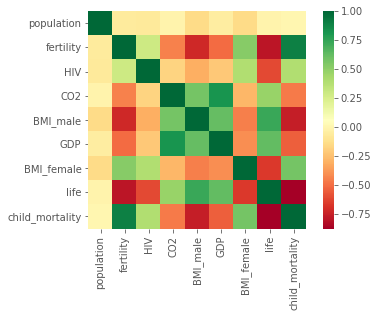

In [50]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

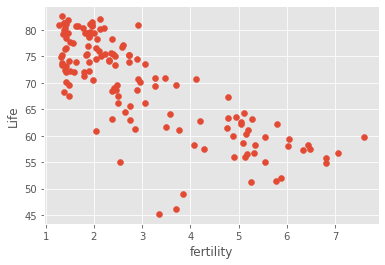

In [52]:
plt.scatter(df['fertility'],df['life'])
plt.xlabel("fertility")
plt.ylabel("Life")
plt.show()

### Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the  score using sckit-learn's .score() method.

Instructions

Import LinearRegression from sklearn.linear_model.
Create a LinearRegression regressor called reg.
Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
Compute and print the  score using the .score() method.
Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

[[1.28      ]
 [1.40877551]
 [1.53755102]
 [1.66632653]
 [1.79510204]
 [1.92387755]
 [2.05265306]
 [2.18142857]
 [2.31020408]
 [2.43897959]
 [2.5677551 ]
 [2.69653061]
 [2.82530612]
 [2.95408163]
 [3.08285714]
 [3.21163265]
 [3.34040816]
 [3.46918367]
 [3.59795918]
 [3.72673469]
 [3.8555102 ]
 [3.98428571]
 [4.11306122]
 [4.24183673]
 [4.37061224]
 [4.49938776]
 [4.62816327]
 [4.75693878]
 [4.88571429]
 [5.0144898 ]
 [5.14326531]
 [5.27204082]
 [5.40081633]
 [5.52959184]
 [5.65836735]
 [5.78714286]
 [5.91591837]
 [6.04469388]
 [6.17346939]
 [6.3022449 ]
 [6.43102041]
 [6.55979592]
 [6.68857143]
 [6.81734694]
 [6.94612245]
 [7.07489796]
 [7.20367347]
 [7.33244898]
 [7.46122449]
 [7.59      ]]
0.6192442167740035


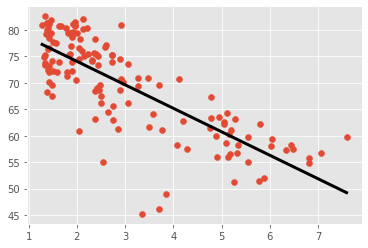

In [70]:
y = df['life'].values
X_fertility = df['fertility'].values.reshape(-1,1)
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
print(prediction_space)
# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(df['fertility'],df['life'])
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [62]:
X= df.drop(['life','Region'],axis=1).values
y= df['life']

In [64]:
y

0      75.3
1      58.3
2      75.5
3      72.5
4      81.5
       ... 
134    76.0
135    68.7
136    75.4
137    52.0
138    49.0
Name: life, Length: 139, dtype: float64

### Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the  score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

Instructions

Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
Compute and print the  score using the .score() method on the test set.
Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

In [68]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train, X_test, y_train, y_test )
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))



[[1.33994100e+06 1.62000000e+00 1.20000000e+00 1.30313789e+01
  2.62644600e+01 2.47430000e+04 1.29516100e+02 5.50000000e+00]
 [1.11397400e+07 6.81000000e+00 3.40000000e+00 4.78391264e-02
  2.14856900e+01 1.75300000e+03 1.27864000e+02 1.68000000e+02]
 [2.71734400e+06 2.39000000e+00 1.70000000e+00 4.39145647e+00
  2.40042100e+01 8.95100000e+03 1.25368500e+02 1.89000000e+01]
 [6.64532550e+07 1.48000000e+00 1.30000000e+00 3.83510189e+00
  2.30080300e+01 1.22160000e+04 1.20496900e+02 1.56000000e+01]
 [1.31145790e+07 5.88000000e+00 1.36000000e+01 1.48981514e-01
  2.06832100e+01 3.03900000e+03 1.32449300e+02 9.49000000e+01]
 [1.47374100e+06 4.28000000e+00 5.30000000e+00 1.07953932e+00
  2.40762000e+01 1.58000000e+04 1.30362500e+02 6.80000000e+01]
 [9.59991600e+06 3.48000000e+00 2.00000000e-01 1.43182915e+00
  2.44333500e+01 5.06600000e+03 1.22415500e+02 5.20000000e+01]
 [1.22297030e+07 5.11000000e+00 8.00000000e-01 4.61633711e-01
  2.19274300e+01 2.16200000e+03 1.30279500e+02 7.58000000e+01]


### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses  as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

Instructions

Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Create a linear regression regressor called reg.
Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

In [71]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793232


### K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

Instructions

Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Create a linear regression regressor called reg.
Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

In [72]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

%timeit cross_val_score(reg,X,y,cv=3)
%timeit cross_val_score(reg,X,y,cv=10)

0.8718712782622108
0.8436128620131201
100 loops, best of 3: 3.76 ms per loop
100 loops, best of 3: 11.9 ms per loop
